# The time Full width at half maximum from the power spectrum

We calculate what is the full width at half maximum of the Rabi frequency pulse for given standard deviation of the power spectrum.

In [1]:
from sympy import symbols, Matrix, init_printing, latex, exp, integrate, diff, pprint, oo
from sympy import solve,log,sqrt,fourier_transform,inverse_fourier_transform,sin, cos, I, DiracDelta, pi
from sympy import atan, Integer, simplify

In [2]:
init_printing()

In [3]:
t,x,y,z=symbols("t x y z",real=True)
omega, nu=symbols("omega nu",real=True)
R=Matrix([x,y,z])
t,x,y,z, omega, nu

In [4]:
sigma,w,wp, omega0, nu0, tau=symbols("sigma w w' omega0 nu0 tau", positive=True)
sigma,w,wp, omega0, nu0, tau

In [5]:
E=exp(-(2*sqrt(log(2))*t/tau)**2)
E

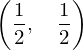

In [6]:
E.subs({t:-tau/2}), E.subs({t:tau/2})

In [7]:
P = E*E.conjugate()
P

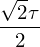

In [8]:
sol = solve(P - P.subs({t:0})/2, t)
sol = [sol[i].simplify() for i in range(len(sol))]
fwhm_P = sol[3]-sol[2]
fwhm_P

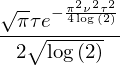

In [9]:
E_spectrum=fourier_transform(E, t, nu)
E_spectrum

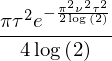

In [10]:
P_spectrum=E_spectrum*E_spectrum.conjugate()
P_spectrum

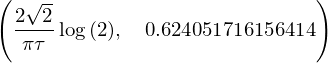

In [11]:
sol = solve(P_spectrum - P_spectrum.subs({nu:0})/2, nu)
fwhm_Pnu = sol[1]-sol[0]
fwhm_Pnu, fwhm_Pnu.subs({tau:1}).n()

In [12]:
print fwhm_Pnu

2*sqrt(2)*log(2)/(pi*tau)


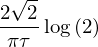

In [13]:
fwhm_Pnu

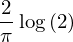

In [14]:
fwhm_Pnu*fwhm_P

In [15]:
(fwhm_Pnu*fwhm_P).n()

In [16]:
sqrt(8.0)

In [17]:
Ptilde=A*exp(-(nu-nu0)**2/2/sigma**2)
Ptilde

NameError: name 'A' is not defined

In [ ]:
P=inverse_fourier_transform(Ptilde,nu,t)
P

In [ ]:
B=symbols("B",real=True)
Omegas=B*exp(pi*t*( I*nu0-pi*sigma**2*t ))
Omegas

In [ ]:
sol=solve( Omegas.subs({nu0:0})-Omegas.subs({nu0:0,t:0})/2 , t)
fwhm=sol[1]-sol[0]
fwhm

In [ ]:
sol=solve( P.subs({nu0:0})-P.subs({nu0:0,t:0})/2 , t)
fwhmp=sol[3]-sol[2]
fwhmp

In [ ]:
tau=symbols("tau",positive=True)
sigma_subs={sigma: solve(tau-fwhm,sigma)[0]}
sigma_subs

# Power of a Gaussian beam

We define a gaussian beam in the following way

In [ ]:
lam,kz=symbols("lambda k_z",positive=True)
E0 =symbols("E_0",real=True)
lam,kz,E0

In [ ]:
zr=pi*w**2/lam
zr=zr.subs({w:wp/2})
zr

In [ ]:
Rz=z*(1+zr**2/z**2)
Rz=Rz.subs({w:wp/2})
Rz

In [ ]:
wz=w*sqrt(1+z**2/zr**2)
wz=wz.subs({w:wp/2})
wz

In [ ]:
psi=atan(z/zr)
psi=psi.subs({w:wp/2})
psi

In [ ]:
# A Gaussian beam:
sigma4=False; sigma4=True
R2=R.dot(R)
Electric_field=E0*w/wz
Electric_field=Electric_field.factor()
Electric_field=Electric_field*exp(-R2/wz**2)
Electric_field=Electric_field*exp(-I*(kz*z + kz*R2/2/Rz -psi ))
#E=E.subs({kz:-kz})
if sigma4:
    Electric_field=Electric_field.subs({w:wp/2})

Electric_field

In [ ]:
E,e,r,epsilon0,c,Omega,hbar=symbols("E e r epsilon_0 c Omega_max hbar",positive=True)
E,e,r,epsilon0,c,Omega,hbar

In the paraxial limit, this is:

In [ ]:
Ewaist=Electric_field.limit(z,0)*Omegas.subs({nu0:0})/B
Ewaist=Ewaist.subs(sigma_subs)
Ewaist=Ewaist.subs({t:t-z/c})
Ewaist

In [ ]:
(Ewaist**2).subs({t:0,z:0,y:0,x:wp/2})

In [ ]:
E0_subs={E0:hbar*Omega/e/r}
E0_subs

In [ ]:
Omegawaist=Ewaist*r*e/hbar
Omegawaist=Omegawaist.subs(E0_subs)
Omegawaist

We check that the full width at half maximum is $\tau$.

In [ ]:
sol=solve(Ewaist.subs({x:0,y:0,z:0})-E0/2,t)
(sol[3]-sol[2]).simplify()

In [ ]:
Iwaist=epsilon0*c/2*Ewaist**2
Iwaist=Iwaist.subs(E0_subs)
Iwaist

In [ ]:
Energy_pulse=integrate(integrate(integrate(Iwaist,(x,-oo,oo)),(y,-oo,oo)),(t,-oo,oo))
Energy_pulse

The peak Rabi frequency in terms of the standard deviation of the power spectrum envelope.

In [ ]:
Rabi_peak=solve(E-Energy_pulse,Omega)[0]
Rabi_peak

# Number of photons

In [ ]:
Iwaist

In [ ]:
E0_subs

In [ ]:
Power_pulse= integrate(integrate( Iwaist ,(x,-oo,oo)),(y,-oo,oo))
Power_pulse= Power_pulse#/exp(-8*t**2*log(2)/tau**2)
n_intensity=Power_pulse/hbar/omega
n_intensity

In [ ]:
n_intensity.subs({Omega:Rabi_peak})

In [ ]:
integrate( n_intensity.subs({Omega:Rabi_peak}) ,(t,-oo,oo))

In [ ]:
I_mine= epsilon0*c/2* (Omegawaist.subs({x:0,y:0}) * hbar/e/r)**2
I_mine

In [ ]:
const=pi*c*epsilon0*hbar*(wp/2)**2/(4*(e*r)**2*omega)
const

In [ ]:
Omegawaist.subs({x:0,y:0})

In [ ]:
integrate(  const*Omegawaist.subs({x:0,y:0})**2 ,(t,-oo,oo)).subs({Omega:Rabi_peak})

In [ ]:
Rabi_peak

# Boundary and initial conditions

We can thus know the Electric field amplitude at the center of the beam as a function of time through (in the paraxial limit) as:

In [ ]:
pprint( Ewaist.subs({x:0,y:0}).subs(sigma_subs) )

And from here, the Rabi frequency is

In [ ]:
Omega_t=Ewaist.subs({x:0,y:0}).subs(sigma_subs).subs(E0_subs)*e*r/hbar

pprint( Omega_t )

Let us check that the FWHM of this is in deed $\tau$.

In [ ]:
sol=solve(Omega_t-Omega/2,t)
fwhm_test=sol[1]-sol[0]
fwhm_test.simplify()

But this does not contain the propagation of the pulse yet. This can be easily added. For a beam directed towards $\hat{z}$:

In [ ]:
Omega_tzp=Omega_t.subs({t:t-z/c})
pprint( Omega_tzp )

For a beam directed towards $-\hat{z}$:

In [ ]:
Omega_tzm=Omega_t.subs({t:t+z/c})
pprint( Omega_tzm )